### A. Community Detection

#### 1. Graph partition

#### A partition of a graph is a separation of its nodes into disjoint groups. Consider the following graph:



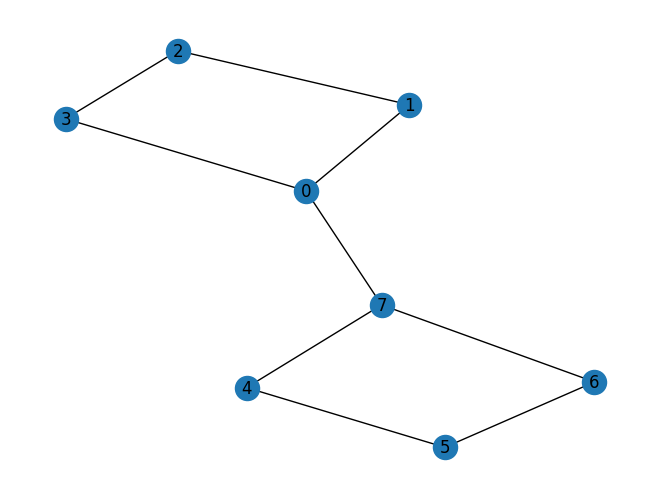

In [60]:
# Install community and  python-louvain for louvain library
!pip install python-louvain
!pip install community

#Construct a graph
import networkx as nx
G = nx.Graph()
nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [4, 5, 6, 7])
G.add_edge(0, 7)

#draw the graph
nx.draw(G, with_labels=True)

In [61]:
#let's define a partition for the graph
partition = [
    {1, 2, 3},
    {4, 5, 6},
    {0, 7},
]

In [62]:
#Check: Returns True if communities is a partition of the nodes of G.

nx.community.is_partition(G, partition)

True

In [63]:
#mapping nodes to the partition

partition_map = {}
for idx, cluster_nodes in enumerate(partition):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map

{1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 0: 2, 7: 2}

In [64]:
#check: two nodes in the same partition

partition_map[0] == partition_map[7]


True

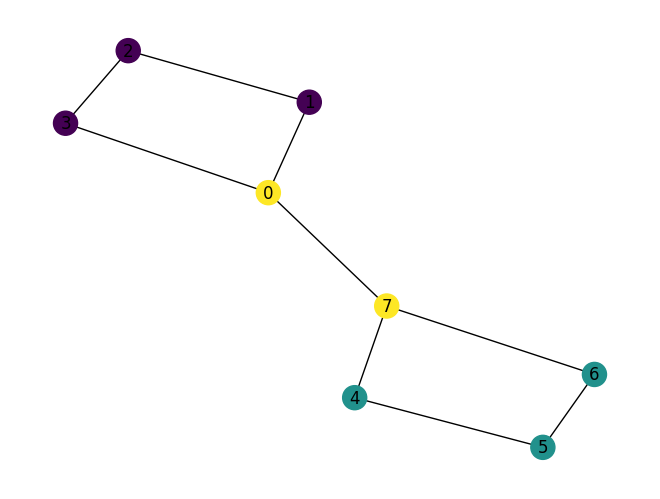

In [65]:
#color each partitions of the graph

node_colors = [partition_map[n] for n in G.nodes]
        
nx.draw(G, node_color=node_colors, with_labels=True)

#### 2. Modularity

#### In the Community library, the module modularity is a greedy modularity. Let's compare the manual Modularity with the library

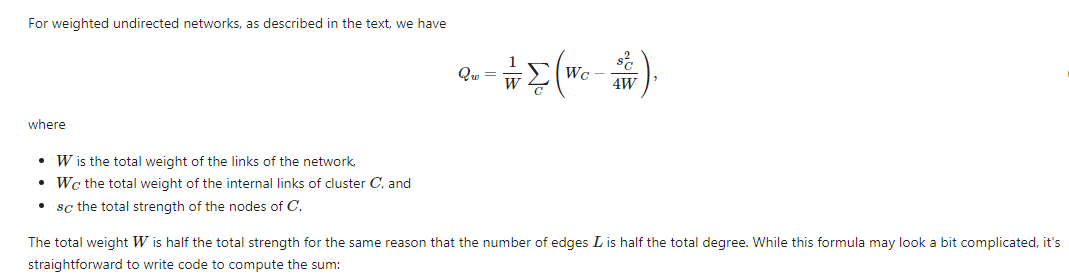

In [66]:
def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n, weight='weight') for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        W_c = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_c - s_c ** 2 / (4 * W)
    
    return summation / W

In [68]:
modularity(G, partition)


0.2222222222222222

#### Let's compare this to a partition we would suspect to have higher modularity:



In [69]:
partition_2 = [
    {0, 1, 2, 3},
    {4, 5, 6, 7},
]
modularity(G, partition_2)

0.3888888888888889

In [ ]:
partition = community.best_partition(M)


#### NetworkX function


In [33]:
nx.community.quality.modularity(G, partition_2)


0.38888888888888884

#### 3. Finding cliques

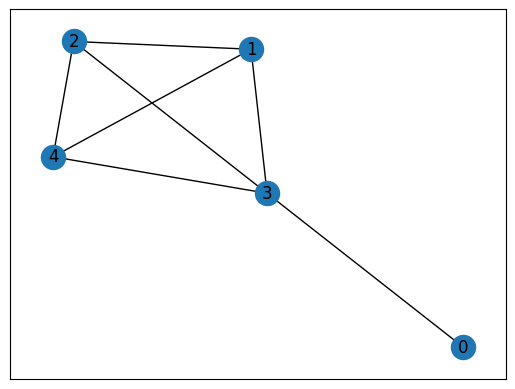

In [34]:
#construct a graph

import networkx as nx
G1 = nx.Graph()
edges = [(1, 2), (2, 3), (1, 3), (3, 4), (3, 0),(1, 4),(4, 2)]
G1.add_edges_from(edges)
nx.draw_networkx(G1)

In [35]:
#Finding all cliques in the graph
res = nx.find_cliques(G1)
cliques = [item for item in res]
cliques = sorted(cliques, key=lambda item: -len(item))
for item in cliques:
    print(item)

[3, 1, 2, 4]
[3, 0]


[frozenset({4, 10, 12})]

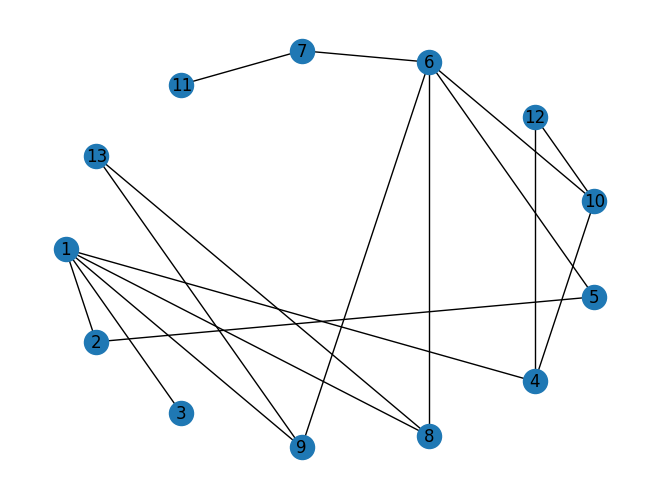

In [36]:
#Find a k-clique (3-clique)
from networkx.algorithms.community import k_clique_communities

import networkx as nx
G = nx.Graph()
edges = [(1, 2),(1,3), (1,9), (1,8), (1,4), (2,5),(4,10),
         (4,12),(5,6),(6,7),(6,8),(6,9),(6,10),(7,11),(8,13),(9,13),(10,12)]


G.add_edges_from(edges)
nx.draw(G, with_labels = True,pos=nx.shell_layout(G))
c = list(k_clique_communities(G, 3))
sorted(c)

#### 4. Louvain method

In [37]:
# import libraries

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import math
import plotly.express as px
import pandas as pd
import numpy as np
import community as community_louvain


In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import pandas as pd
import numpy as np
import math

# graph related library
import networkx as nx
import leidenalg
import igraph as ig


#finding the best partition in G using louvain method
import community.community_louvain as cl
partition = cl.best_partition(G)

In [18]:
import community.community_louvain as community_louvain
import networkx.algorithms.community as nx_comm


In [19]:
#Colouring the nodes in each partition

def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#EF9A9A", "#BA68C8", "#64B5F6", "#81C784",
              "#FFF176", "#BDBDBD"][:number_of_colors]
    node_colors = []
    
    # iterate each node in the graph and find which community it belongs to
    # if the current node is found at a specific community, add color to the 
    # node_colors list
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

In [20]:
# convert the python-louvain package output to NetworkX package community function output format
def get_louvain_communities(graph, random_state=1):
    louvain_partition_dict = community_louvain.best_partition(graph, random_state=random_state)
    unique_partition_labels = list(set(louvain_partition_dict.values()))
    communities = [[] for i in range(len(unique_partition_labels))]
    for node in louvain_partition_dict.keys():
        communities[louvain_partition_dict[node]].append(node)
    return communities

In [21]:
# get communities using louvain algorithm
louvain_communities = get_louvain_communities(G, random_state=1)
louvain_communities

[[9, 8, 6, 7, 11, 13], [1, 2, 3, 5], [4, 10, 12]]

In [22]:
#Visualizing community

def visualize_communities(graph, communities):
    # create visualization
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx_comm.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, 
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(10,6)) 
    nx.draw(graph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show() 

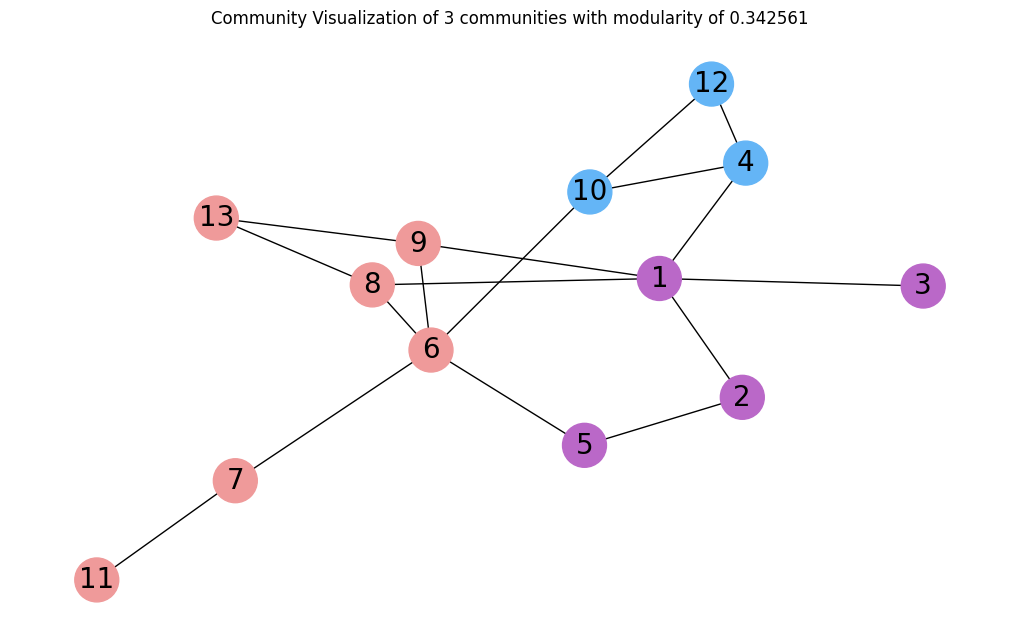

In [38]:
visualize_communities(G, louvain_communities)


### B. Link Prediction

In [43]:
# Calculate graph distance
def calculate_graph_distance(G, source, target):
    return -nx.shortest_path_length(G, source=source, target=target)

# Instantiate the graph
G = nx.Graph()

edges = [("A", "B"), ("B", "C"), ("B", "D"), ("D", "E")]
# add node/edge pairs
G.add_edges_from(edges)

print(f"Graph distance:")
print(f"(A, C) | {calculate_graph_distance(G, 'A', 'C')}")
print(f"(C, D) | {calculate_graph_distance(G, 'C', 'D')}")
print(f"(A, E) | {calculate_graph_distance(G, 'A', 'E')}")

Graph distance:
(A, C) | -2
(C, D) | -2
(A, E) | -3


#### Common neighbors

In [44]:
G = nx.Graph()
edges = [(0, 1), (1, 2), (0, 3), (1, 3), (0, 4), (1, 5), (4, 5), (1, 6), 
         (2, 6), (5, 6)]
G.add_edges_from(edges)

cn_list = sorted(nx.common_neighbors(G, 6, 1))

print(cn_list)

[2, 5]


#### Jaccard’s coefficient

In [46]:
# Calculate Jaccard’s coefficient of node pairs in a list of nodes
node_list = [(6, 5), (1, 3), (3, 1)]
preds = nx.jaccard_coefficient(G, node_list)
for u, v, p in preds:
    print(f"({u}, {v}) -> {p:.8f}")

(6, 5) -> 0.20000000
(1, 3) -> 0.16666667
(3, 1) -> 0.16666667


#### Adamic-Adar 

In [48]:
# Calculate Adamic-Adar of node pairs in a list of nodes
node_list = [(6, 1), (1, 3), (3,5)]
preds = nx.adamic_adar_index(G, node_list)
for u, v, p in preds:
    print(f"({u}, {v}) -> {p:.8f}")

(6, 1) -> 2.35293427
(1, 3) -> 0.91023923
(3, 5) -> 0.62133493


#### Preferential attachment (PA)

In [50]:
# Calculate Preferential attachment (PA) of node pairs in a list of nodes
node_list = [(6, 1), (1, 3), (3,5)]
preds = nx.preferential_attachment(G, node_list)
for u, v, p in preds:
    print(f"({u}, {v}) -> {p:.8f}")

(6, 1) -> 15.00000000
(1, 3) -> 10.00000000
(3, 5) -> 6.00000000


#### SimRank similarity

In [52]:
# Calculate SimRank similarity between 2 nodes
source = 6
target = 1
nx.simrank_similarity(G, source, target)


0.5475563383768501